In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Housing.csv')

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


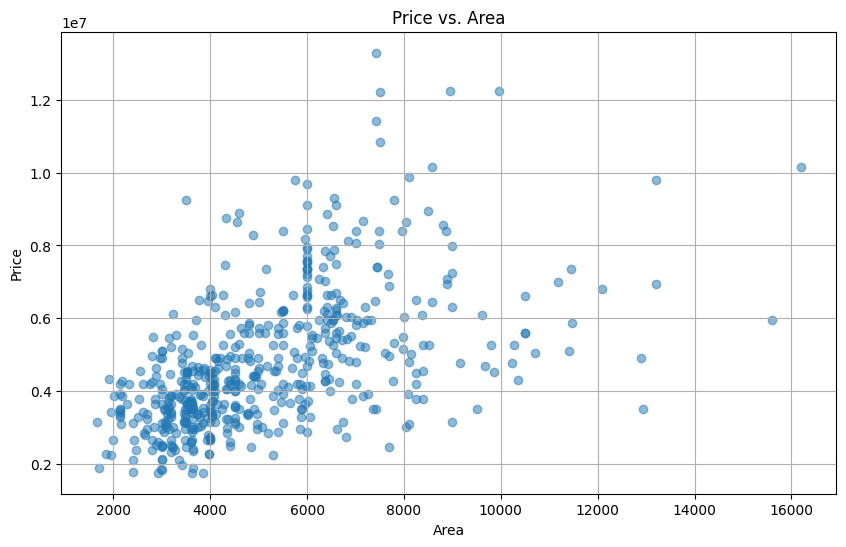

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Outliers based on z-score:
      price      area  bedrooms  bathrooms   stories mainroad guestroom  \
6  10150000  1.607004  1.416566   3.577717  2.546730      yes        no   
7  10150000  5.143483  2.775158   3.577717  0.231911      yes        no   
8   9870000  1.384234  1.416566  -0.569357  0.231911      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea  \
6       no              no             yes  1.564977      yes   
7       no              no              no -0.797831       no   
8      yes              no             yes  1.564977      yes   

  furnishingstatus  price_zscore  
6   semi-furnished      3.190358  
7      unfurnished      3.190358  
8        furnished      3.026879  


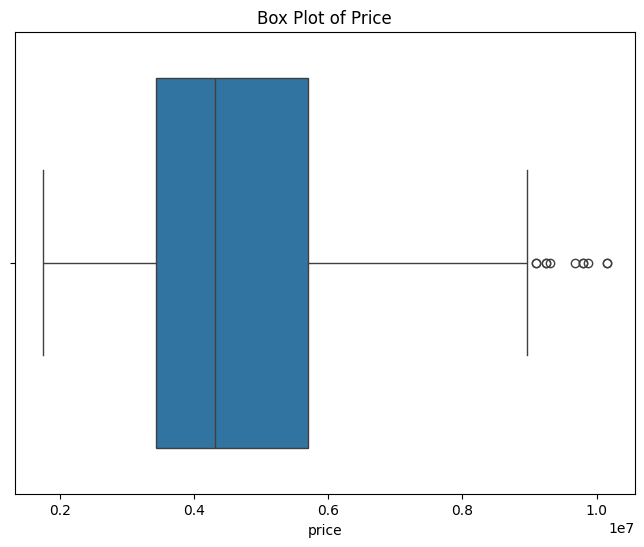

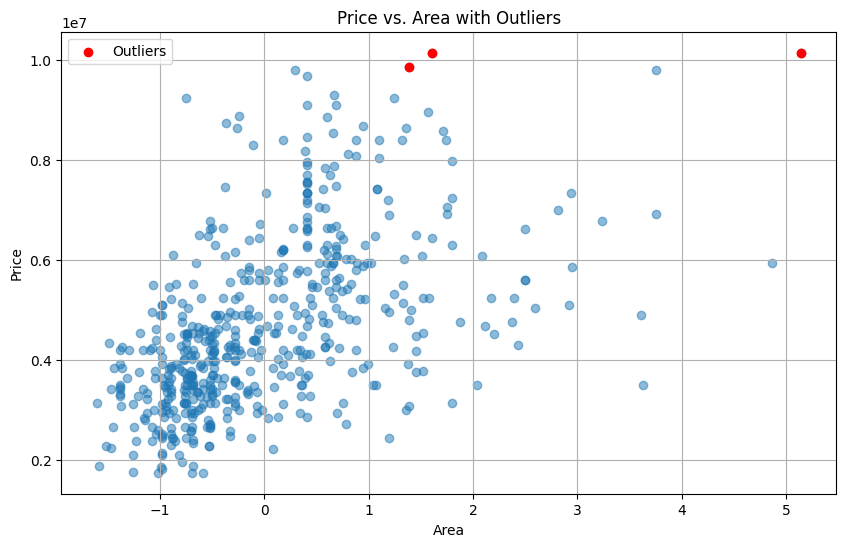

In [ ]:
# prompt: check outliers

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Calculate z-scores for 'price'
df['price_zscore'] = np.abs((df['price'] - df['price'].mean()) / df['price'].std())

# Identify outliers based on z-score threshold (e.g., z-score > 3)
outliers = df[df['price_zscore'] > 3]

# Print or visualize outliers
print("Outliers based on z-score:")
print(outliers)

# Box plot for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.show()

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.scatter(outliers['area'], outliers['price'], color='red', label='Outliers')  # Highlight outliers in red
plt.title('Price vs. Area with Outliers')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: preprocess the data , remove outliers , duplicates , missing and null vlaues

import pandas as pd
# Remove outliers based on z-score
df = df[df['price_zscore'] <= 3]

# Drop the 'price_zscore' column as it's no longer needed
df = df.drop('price_zscore', axis=1)

# Check for and remove duplicates
print(f"Number of duplicates before removal: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicates after removal: {df.duplicated().sum()}")


# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Handle missing values (example: fill with the mean)
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # For non-numeric columns, fill with the most frequent value
           df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after handling:\n", df.isnull().sum())

# Further explore and handle any remaining inconsistencies or outliers in the data as needed


Number of duplicates before removal: 0
Number of duplicates after removal: 0
Missing values before handling:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Missing values after handling:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_zscore
6,10150000,1.607004,1.416566,3.577717,2.546730,1,0,0,0,1,1.564977,1,1,3.190358
7,10150000,5.143483,2.775158,3.577717,0.231911,1,0,0,0,0,-0.797831,0,2,3.190358
8,9870000,1.384234,1.416566,-0.569357,0.231911,1,1,1,0,1,1.564977,1,0,3.026879
9,9800000,0.293587,0.057973,1.504180,2.546730,1,1,0,0,1,0.383573,1,2,2.986009
10,9800000,3.751168,0.057973,-0.569357,0.231911,1,0,1,0,1,1.564977,1,0,2.986009


In [ ]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 908837989590.2633
R-squared: 0.7629999122873669


In [ ]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")

Training Mean Squared Error: 794941992558.6168
Training R-squared: 0.7043208612571492
